In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# Read the input image
image = cv2.imread('E:/ARK PERCEPTION/Luna/Input/table.png')
resized_image = cv2.resize(image, (300,250))


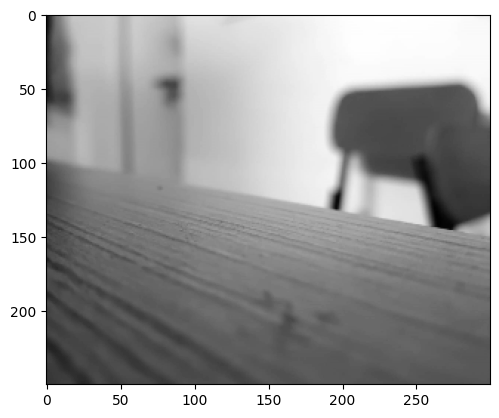

In [20]:
# Convert the image to grayscale
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(gray, cmap='gray')
#plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

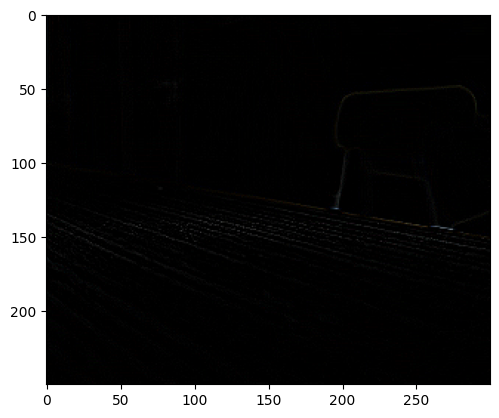

In [21]:
#create laplace kernel matrix 

laplacian_kernel = np.array([[0, 1, 0],
                            [1, -4, 1],
                            [0, 1, 0]])

edge_image = cv2.filter2D(resized_image, -7, laplacian_kernel)


threshold_value = 30

#_, edge_image = cv2.threshold(gradient_magnitude, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite('E:/ARK PERCEPTION/Luna/output/edge.png', edge_image)

#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(edge_image, cmap='gray')
#plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


Number of detected lines: 531
Line: (36, 150) to (36, 149)
Line: (0, 100) to (0, 96)
Line: (7, 101) to (7, 98)
Line: (275, 48) to (275, 43)
Line: (252, 129) to (252, 110)
Line: (19, 66) to (19, 45)
Line: (199, 133) to (199, 117)
Line: (12, 4) to (12, 2)
Line: (6, 9) to (6, 0)
Line: (245, 141) to (245, 140)
Line: (92, 57) to (92, 43)
Line: (16, 37) to (16, 14)
Line: (200, 133) to (200, 113)
Line: (192, 132) to (192, 116)
Line: (213, 111) to (213, 95)
Line: (205, 54) to (205, 47)
Line: (204, 126) to (204, 94)
Line: (262, 144) to (262, 133)
Line: (202, 134) to (204, 133)
Line: (1, 29) to (1, 0)
Line: (88, 59) to (88, 41)
Line: (15, 36) to (15, 13)
Line: (190, 131) to (190, 119)
Line: (212, 110) to (212, 93)
Line: (224, 113) to (224, 107)
Line: (243, 116) to (243, 109)
Line: (222, 52) to (222, 46)
Line: (250, 120) to (250, 109)
Line: (197, 122) to (197, 87)
Line: (292, 68) to (292, 50)
Line: (279, 48) to (279, 43)
Line: (3, 62) to (3, 60)
Line: (225, 113) to (225, 107)
Line: (198, 133) to 

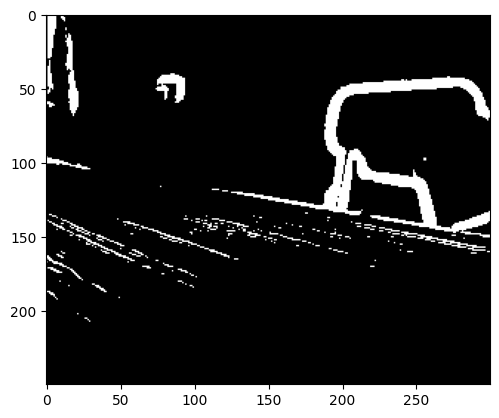

In [26]:
# Binarize the edge image (if necessary)
_, binary_image = cv2.threshold(edge_image, 127, 255, cv2.THRESH_BINARY)

#why 127 

# Define Hough Transform parameters
theta_resolution = 1 # Resolution of theta in degrees
rho_resolution = 1   # Resolution of rho in pixels
threshold = 1     # Minimum number of votes to consider a line
min_line_length = 10 # Minimum line length
max_line_gap = 1     # Maximum gap between line segments to treat them as a single line

# Perform Hough Transform
lines = cv2.HoughLinesP(binary_image, rho_resolution, theta_resolution, threshold, min_line_length, max_line_gap)

if lines is not None:
    num_lines = len(lines)
    print(f"Number of detected lines: {num_lines}")
else:
    print("No lines detected.")



# Draw detected lines on the original image
output_image = cv2.cvtColor(edge_image, cv2.COLOR_GRAY2BGR)  # Convert to color for drawing lines
plt.imshow(output_image)
#if lines is not None:
   # for line in lines:
   #     x1, y1, x2, y2 = line[0]
   #     cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        print(f"Line: ({x1}, {y1}) to ({x2}, {y2})")

# Display or save the result

plt.imshow(output_image)
#cv2.imshow('Detected Lines', output_image)


# Draw detected lines on the original image


compleyed writing lines


True

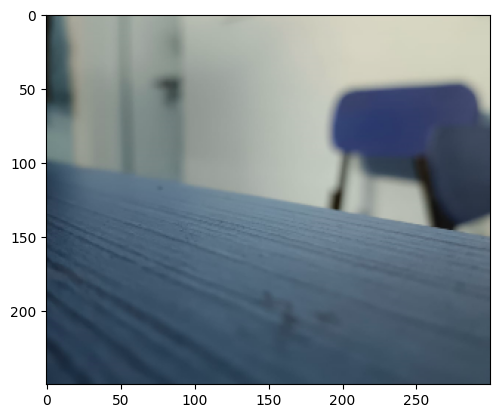

In [27]:
table_image = cv2.imread('E:/ARK PERCEPTION/Luna/output/resized_image.png')
plt.imshow(table_image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
# Draw the line on the image
        cv2.line(table_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

print("compleyed writing lines")
# Save the final result
cv2.imwrite('E:/ARK PERCEPTION/Luna/output/detected_lines4.png', table_image)